# Prediction using supervised learning<br>
**Predict the percentage of an student based on the no. of study hours.**<bR>
 In this task we have to find the students scores based on their study hours. This is simple regression problem type because it has only two variables. This problem can be solved by using regression libraries or we can make regression algorithm.

# Importing required libraries.

In [ ]:
#Importing requried packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Loading the Dataset

In [ ]:
#Loading dataset from remote url
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
Data = pd.read_csv(url)
print('Data loaded successfully')

Data loaded successfully


# Top and Bottom Values of Dataset


In [ ]:
Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
Data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Shape of Data

In [ ]:
Data.shape

(25, 2)

# Data Information

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Statistical Properties of Dataset

In [ ]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Unique Values

In [ ]:
Data.nunique()

Hours     23
Scores    23
dtype: int64

# Data Visualization

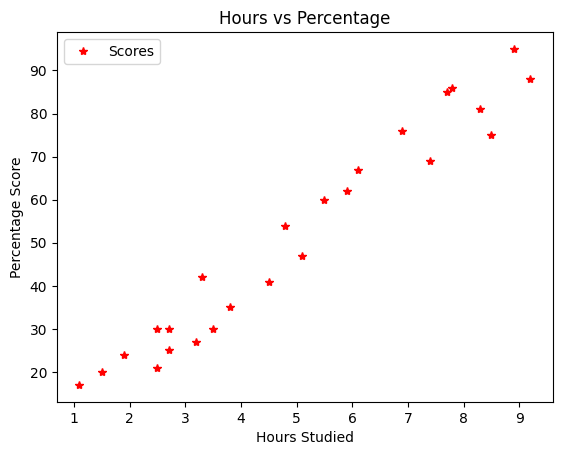

In [ ]:
Data.plot(x="Hours", y="Scores", style='*', color='red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<Axes: >

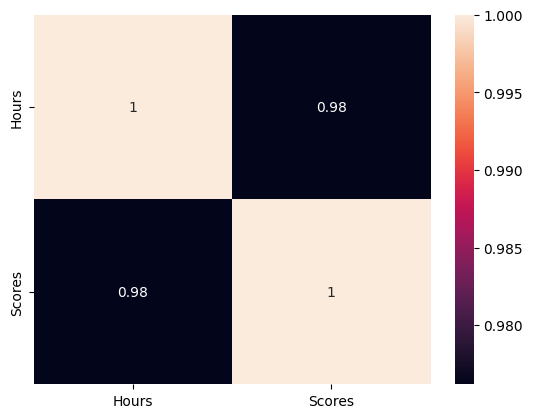

In [ ]:
#Plotting correlation between feature and target
sns.heatmap(Data.corr(), annot = True, linecolor='black')

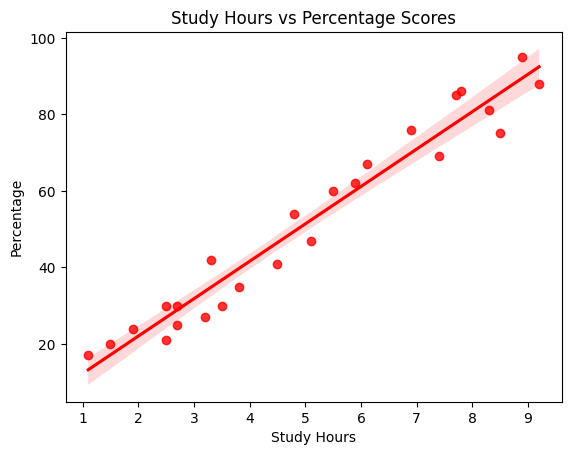

In [ ]:
#Plotting regression plot to confirm above relationship between feature and target.
sns.regplot(x=Data['Hours'],y=Data['Scores'],data=Data, color='red')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

# Data Prepration
Dividing Data

In [ ]:
x = Data.iloc[:, :-1].values  #Attribute
y = Data.iloc[:, 1].values  #Labels
print("Hours Studied = ",x[0:5])
print("Scores Obtained = ",y[0:5])

Hours Studied =  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
Scores Obtained =  [21 47 27 75 30]


# Train-Test Split
We dont have extra data for testing. So, we have to split the given data for training as well as testing. One can done this using "train_test_split()" inbuilt function of Scikit-Learn library. We gave the est size 24%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.24,random_state =42 )

# Training

In [ ]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In liear regression model the equation of the line is "Y = aX + c" where a is coefficient and c is intersept. After training our model we got most accurate values of coefficient and intersept

In [ ]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)
     

Coefficient - [9.60328059]
Intercept -  3.4359696365345442


These Coefficient and Intersept values are used to predict the result.

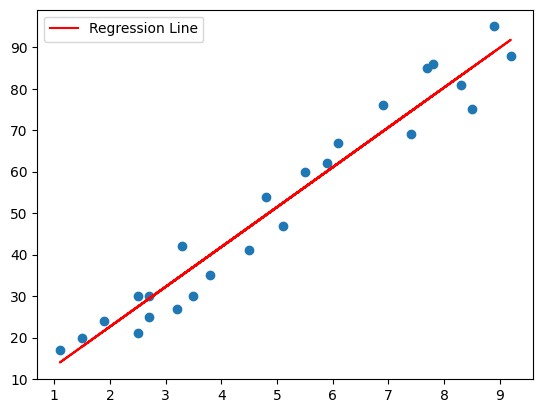

In [ ]:
# Plotting the regression line
line = regressor.coef_*x + regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red', label='Regression Line')
plt.legend()
plt.show()

# Prediction

In [ ]:
print(x_test) # Data for test
y_pred = regressor.predict(x_test) #Predicted data

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]]


In [ ]:
#Comparing the original and predicted values
df=pd.DataFrame({'Original':y_test,'Predicted':y_pred})
df

,Original,Predicted
0,81,83.143199
1,30,27.444171
2,21,27.444171
3,76,69.698606
4,62,60.095325
5,25,29.364827


In [ ]:
#Training and Testing Scores
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.9475373814076595
Test Score: 0.9684201924053587


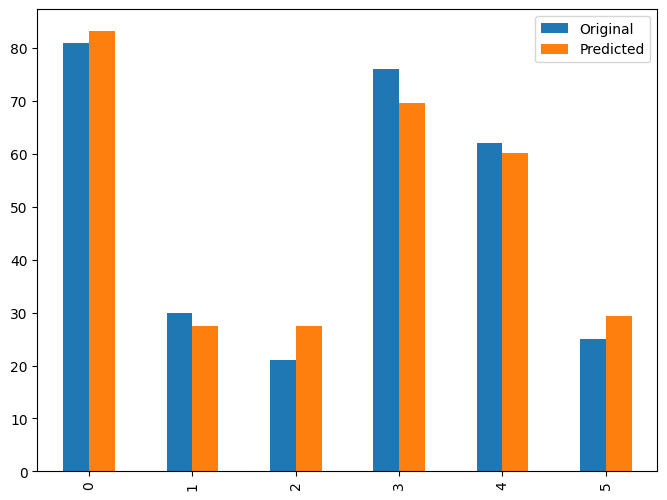

In [ ]:
#plot of original and predicted values
df.plot(kind='bar',figsize=(8,6))
plt.show()

# Testing

In [ ]:
# Testing with some new data
hours = float(input("Enter the Study Hours : "))
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the Study Hours : 9
No of Hours = 9.0
Predicted Score = 89.86549494381529


# Evaluating the model

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9523491564239777
Mean Squared Error: 19.173329294335417
Root Mean Squared Error: 4.37873603844025
R^2: 0.9684201924053587
